In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Mercado.csv', delimiter=';')

## Análise do dataframe e Limpeza

In [4]:
df.head()

,NumeroDoPedido,QuantidadeEncomendada,ValorUnitario,ORDERLINENUMBER,VENDAS,DataDoPedido,Status,QTR_ID,Mes,Ano,...,ENDEREÇO1,ENDEREÇO2,Cidade,EstDO,CodigoPostal,Pais,Territorio,UltimoNomeDoContato,PrimeiroNomeDoContato,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.tail()

,NumeroDoPedido,QuantidadeEncomendada,ValorUnitario,ORDERLINENUMBER,VENDAS,DataDoPedido,Status,QTR_ID,Mes,Ano,...,ENDEREÇO1,ENDEREÇO2,Cidade,EstDO,CodigoPostal,Pais,Territorio,UltimoNomeDoContato,PrimeiroNomeDoContato,DEALSIZE
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"""C/ Moralzarzal","86""",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,"Diego,Small"
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,"Pirkko,Medium"
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"""C/ Moralzarzal","86""",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,"Diego,Medium"
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,2005-05-06,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [6]:
df.columns

Index(['NumeroDoPedido', 'QuantidadeEncomendada', 'ValorUnitario',
       'ORDERLINENUMBER', 'VENDAS', 'DataDoPedido', 'Status', 'QTR_ID', 'Mes',
       'Ano', 'LinhaDeProduto', 'MSRP', 'CodigoDoProduto', 'NomeDoCliente',
       'Telefone', 'ENDEREÇO1', 'ENDEREÇO2', 'Cidade', 'EstDO', 'CodigoPostal',
       'Pais', 'Territorio', 'UltimoNomeDoContato', 'PrimeiroNomeDoContato',
       'DEALSIZE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
NumeroDoPedido           2823 non-null int64
QuantidadeEncomendada    2823 non-null int64
ValorUnitario            2823 non-null float64
ORDERLINENUMBER          2823 non-null int64
VENDAS                   2823 non-null float64
DataDoPedido             2823 non-null object
Status                   2823 non-null object
QTR_ID                   2823 non-null int64
Mes                      2823 non-null int64
Ano                      2823 non-null int64
LinhaDeProduto           2823 non-null object
MSRP                     2823 non-null int64
CodigoDoProduto          2823 non-null object
NomeDoCliente            2823 non-null object
Telefone                 2823 non-null object
ENDEREÇO1                2823 non-null object
ENDEREÇO2                1454 non-null object
Cidade                   1869 non-null object
EstDO                    2156 non-null object
CodigoPostal            

In [8]:
df['dia'] = df['DataDoPedido'].apply(lambda x: x.split('-')[2])

In [9]:
df2 = df[['LinhaDeProduto', 'Ano', 'Mes', 'dia', 'MSRP','ValorUnitario', 'QuantidadeEncomendada', 'VENDAS', 'Status']]

In [10]:
# deixar apenas o status Shipped
# Linha de produto, tranformar em numero
def troca_nome_linha_de_produto(x):
    linha_de_produto_cod = {'Motorcycles':'1', 
                            'Classic Cars':'2', 
                            'Trucks and Buses':'3', 
                            'Vintage Cars':'4',
                            'Planes':'5', 
                            'Ships':'6', 
                            'Trains':'7'}
    return linha_de_produto_cod[x]  

In [11]:
df2['LinhaDeProduto_cod'] = df2['LinhaDeProduto'].apply(lambda x: troca_nome_linha_de_produto(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2.groupby(['LinhaDeProduto', 'LinhaDeProduto_cod']).size()

LinhaDeProduto    LinhaDeProduto_cod
Classic Cars      2                     967
Motorcycles       1                     331
Planes            5                     306
Ships             6                     234
Trains            7                      77
Trucks and Buses  3                     301
Vintage Cars      4                     607
dtype: int64

In [13]:
df2.head(10)

,LinhaDeProduto,Ano,Mes,dia,MSRP,ValorUnitario,QuantidadeEncomendada,VENDAS,Status,LinhaDeProduto_cod
0,Motorcycles,2003,2,24,95,95.70,30,2871.00,Shipped,1
1,Motorcycles,2003,5,07,95,81.35,34,2765.90,Shipped,1
2,Motorcycles,2003,7,01,95,94.74,41,3884.34,Shipped,1
3,Motorcycles,2003,8,25,95,83.26,45,3746.70,Shipped,1
4,Motorcycles,2003,10,10,95,100.00,49,5205.27,Shipped,1
5,Motorcycles,2003,10,28,95,96.66,36,3479.76,Shipped,1
6,Motorcycles,2003,11,11,95,86.13,29,2497.77,Shipped,1
7,Motorcycles,2003,11,18,95,100.00,48,5512.32,Shipped,1
8,Motorcycles,2003,12,01,95,98.57,22,2168.54,Shipped,1
9,Motorcycles,2004,1,15,95,100.00,41,4708.44,Shipped,1


In [14]:
df2.rename(columns={ 
                    'LinhaDeProduto':'linhaDeProduto',
                    'Ano':'ano',
                    'Mes':'mes',
                    'Dia':'dia',
                    'ValorUnitario':'valorUnitario',
                    'QuantidadeEncomendada':'quantidadeEncomendada',
                    'VENDAS':'vendas',
                    'Status':'status',
                    'LinhaDeProduto_cod':'linhaDeProduto_cod'
                  }, inplace=True)

/home/manoel/.local/lib/python3.7/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [15]:
df_vendas = df2[df2['status']== 'Shipped']
df_vendas.drop("linhaDeProduto", axis=1, inplace=True)
df_vendas.drop("status", axis=1, inplace=True)

/home/manoel/.local/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df_vendas.to_csv(r'df_vendas.csv', index = None, header=True)

In [17]:
df_vendas.corr()

,ano,mes,MSRP,valorUnitario,quantidadeEncomendada,vendas
ano,1.000000,-0.397432,-0.004574,0.002061,0.043321,0.028811
mes,-0.397432,1.000000,0.001260,-0.001936,-0.025643,-0.006416
MSRP,-0.004574,0.001260,1.000000,0.669294,0.017726,0.643001
valorUnitario,0.002061,-0.001936,0.669294,1.000000,-0.000829,0.663840
quantidadeEncomendada,0.043321,-0.025643,0.017726,-0.000829,1.000000,0.536022
vendas,0.028811,-0.006416,0.643001,0.663840,0.536022,1.000000


## Análise de dados exploratória

In [20]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

TypeError: unsupported operand type(s) for +: 'float' and 'str'

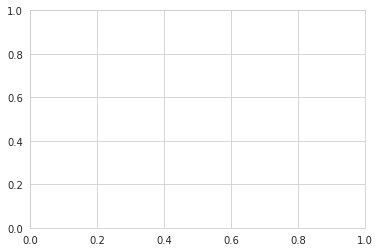

In [28]:
sns.distplot(df_vendas)